<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/bollingerbands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install alpha_vantage

     |████████████████████████████████| 1.3MB 8.9MB/s 
     |████████████████████████████████| 143kB 39.8MB/s 
     |████████████████████████████████| 296kB 39.3MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=2d34771d1f2af75d6ff891a3f4f2631b2a3642d50f96dd1821d7586c961d05ef
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl


In [52]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from pylab import *

In [54]:
time=TimeSeries(key="000W9HI05KWAWA7B",output_format="pandas") 

In [55]:
euro=time.get_intraday("EURUSD",interval="1min",outputsize="full")[0]

In [56]:
close=euro.iloc[:,3]

In [70]:
t=20
factor_stdev=2
history=[]
sma_values=[]
upper_band=[]
lower_band=[]

In [71]:
for x in close:
  history.append(x)
  if len(history)>t:
    del history[0]
  sma=mean(history)
  sma_values.append(sma)
  varianza=0

  for la_historia in history:
    varianza = varianza + ((la_historia-sma)**2)
  desviacion_std=sqrt(varianza/len(history))
  upper_band.append(sma+factor_stdev*desviacion_std)
  lower_band.append(sma-factor_stdev*desviacion_std)

In [72]:
dataframe=pd.DataFrame(columns=["close","sma_values","upper","lower"])
dataframe["close"]=close
dataframe["sma_values"]=sma_values
dataframe["upper"]=upper_band
dataframe["lower"]=lower_band

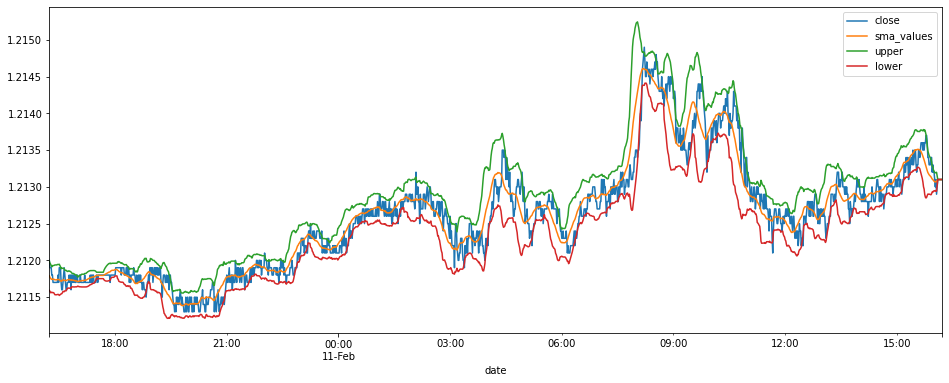

In [75]:
dataframe.plot(figsize=(16,6))

In [1]:
import pandas as pd
from pandas_datareader import data

In [31]:
inicio="2021-02-02"
fin="2021-02-11"
key="000W9HI05KWAWA7B"
euro=data.DataReader("EURUSD","av-intraday",start=inicio,end=fin,api_key="000W9HI05KWAWA7B")


,open,high,low,close,volume
2021-02-10 16:02:00,1.2120,1.2121,1.2119,1.2120,0
2021-02-10 16:03:00,1.2121,1.2121,1.2118,1.2120,0
2021-02-10 16:04:00,1.2120,1.2121,1.2118,1.2121,0
2021-02-10 16:05:00,1.2120,1.2122,1.2119,1.2120,0
2021-02-10 16:06:00,1.2121,1.2122,1.2119,1.2121,0
...,...,...,...,...,...
2021-02-10 23:55:00,1.2122,1.2122,1.2121,1.2121,0
2021-02-10 23:56:00,1.2121,1.2122,1.2121,1.2122,0
2021-02-10 23:57:00,1.2122,1.2122,1.2120,1.2121,0
2021-02-10 23:58:00,1.2121,1.2122,1.2121,1.2121,0


,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Information Technology,0.95%,-0.15%,2.02%,4.14%,12.93%,4.59%,37.03%,117.23%,276.68%,448.75%
Materials,0.15%,-0.20%,1.07%,-4.13%,5.71%,1.31%,22.38%,26.14%,83.09%,87.63%
Health Care,0.12%,0.17%,1.05%,-1.10%,4.81%,2.23%,12.86%,42.62%,83.19%,262.63%
Communication Services,0.03%,0.63%,2.79%,7.22%,12.50%,6.93%,25.64%,52.78%,49.27%,87.44%
Real Estate,-0.31%,0.60%,2.15%,7.75%,5.68%,5.00%,-3.43%,28.52%,NaN,NaN
Industrials,-0.32%,-0.16%,2.61%,0.19%,6.91%,1.29%,7.66%,22.28%,74.80%,134.22%
Financials,-0.37%,-0.06%,3.66%,1.16%,15.91%,5.86%,1.30%,13.12%,89.31%,128.95%
Consumer Staples,-0.43%,-0.14%,1.81%,-1.80%,1.69%,-2.76%,2.59%,22.50%,32.56%,122.29%
Consumer Discretionary,-0.49%,-0.94%,0.74%,1.32%,10.64%,5.20%,34.87%,70.76%,151.71%,343.80%
Utilities,-0.66%,0.39%,0.97%,1.64%,-2.86%,0.98%,-7.38%,30.91%,36.26%,98.59%
